/tmp/ipython-input-3543569256.py:5: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/sample_data/train.csv')


<bound method NDFrame.head of             ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks    25  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks    25  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks    25  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks    25  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks    25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \


<Axes: xlabel='Payment_of_Min_Amount'>

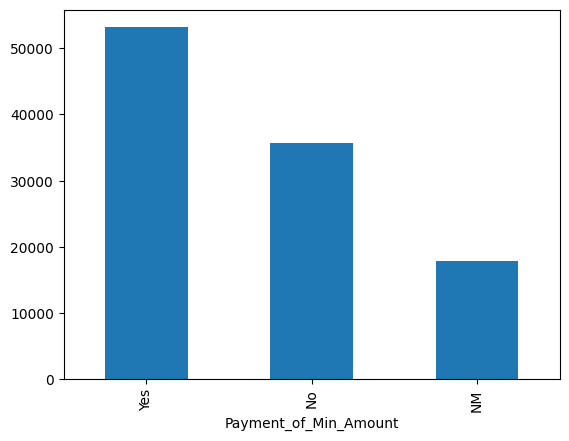

In [80]:
# import pandas
import pandas as pd

#load the dataset
df = pd.read_csv('/content/sample_data/train.csv')
test_df=pd.read_csv('/content/sample_data/test.csv')

#print the dataset
print(df.head)

#plot the distribution of the credit mix
df['Credit_Score'].value_counts().plot(kind='bar')
df['Payment_of_Min_Amount'].value_counts().plot(kind='bar')



In [81]:
print(df.columns)
print(df['Interest_Rate'])

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')
0           3
1           3
2           3
3           3
4           3
         ... 
99995       7
99996       7
99997    5729
99998       7
99999       7
Name: Interest_Rate, Length: 100000, dtype: int64


<Axes: xlabel='Payment_of_Min_Amount'>

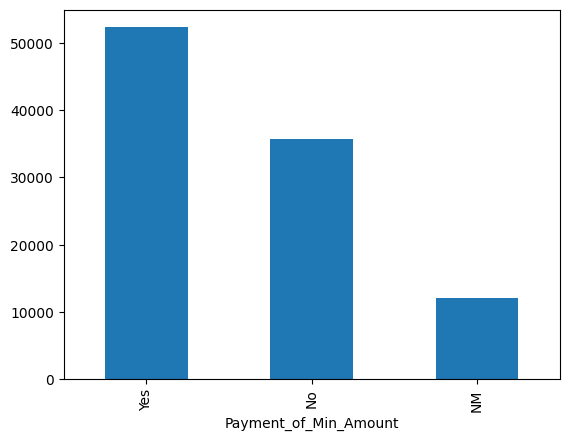

In [83]:
#Plot
#plot the distribution of the payment
df['Payment_of_Min_Amount'].value_counts().plot(kind='bar')

<Axes: xlabel='Payment_Behaviour'>

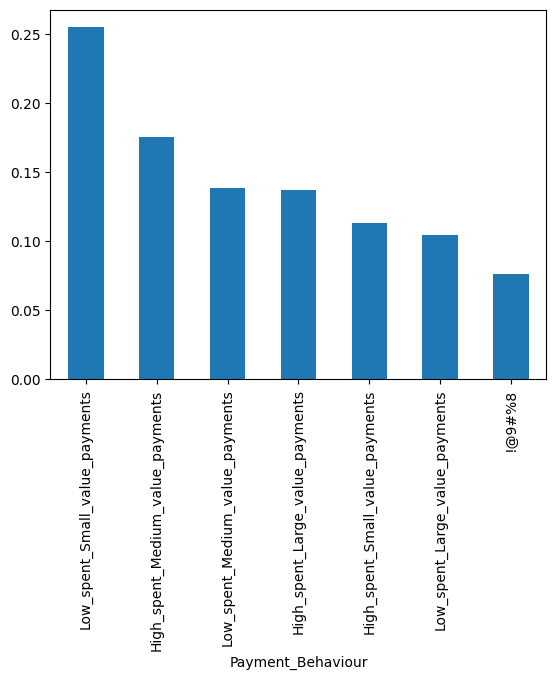

In [84]:
# plot the number of customers which
df['Payment_Behaviour'].value_counts(normalize=True).plot(kind='bar')



In [86]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Select only numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
print(numerical_cols)
X = df[numerical_cols].drop('Payment_of_Min_Amount', axis=1, errors='ignore') # Drop Credit_Score if it's numeric
y = df['Payment_of_Min_Amount']

# import a label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_rfc_pred = rfc.predict(X_test)



# Evaluate the model (optional for this step, but good practice)
print("Accuracy Random Forest:", accuracy_score(y_test, y_rfc_pred))
print(classification_report(y_test, y_rfc_pred))




Index(['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month'],
      dtype='object')
Accuracy Random Forest: 0.8303
              precision    recall  f1-score   support

           0       0.13      0.04      0.06      2370
           1       0.85      0.92      0.89      7115
           2       0.86      0.95      0.90     10515

    accuracy                           0.83     20000
   macro avg       0.61      0.64      0.61     20000
weighted avg       0.77      0.83      0.80     20000



In [87]:
#OPTIONALfrom sklearn.model_selection import GridSearchCV
# 1. Define the parameter grid
# These are common hyperparameters to tune for a RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300], # Number of trees in the forest
    'max_depth': [None, 10],     # Maximum depth of the tree    # Minimum number of samples required to split an internal node
}

# 2. Initialize the Grid Search
# We use the existing Random Forest Classifier and set up GridSearchCV
# 'cv=5' means 5-fold cross-validation will be used on the training data.
# 'scoring="accuracy"' will optimize for accuracy.
grid_search = GridSearchCV(
    estimator=XGBClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1, # Use all available cores
    verbose=2 # Verbosity level
)

# 3. Fit the Grid Search to the training data
print("Starting Grid Search...")
# Grid Search will train and evaluate the model for every combination in param_grid
grid_search.fit(X_train, y_train)
print("Grid Search complete.")

# 4. Get the best parameters and the corresponding score
print("\n--- Grid Search Results ---")
print(f"Best Parameters found: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# 5. Evaluate the best model on the test set
# The 'best_estimator_' is the model trained with the optimal parameters
best_rfc = grid_search.best_estimator_
y_best_pred = best_rfc.predict(X_test)

# 6. Evaluate the performance of the best model
print("\n--- Best Model Evaluation on Test Set ---")
print("Accuracy of Optimized Random Forest:", accuracy_score(y_test, y_best_pred))
print(classification_report(y_test, y_best_pred))

Starting Grid Search...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


KeyboardInterrupt: 

In [88]:
# Do the same for an xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Make predictions on the test set
y_xgb_pred = xgb.predict(X_test)

# Evaluate the xgb model
print("Accuracy XGBoost:", accuracy_score(y_test, y_xgb_pred))
print(classification_report(y_test, y_xgb_pred))




Accuracy XGBoost: 0.81265
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2370
           1       0.81      0.89      0.85      7115
           2       0.82      0.94      0.88     10515

    accuracy                           0.81     20000
   macro avg       0.54      0.61      0.57     20000
weighted avg       0.72      0.81      0.76     20000



In [90]:
# Compare the likelyhood that Bad credit scoring corresponsd to not makig payment to this predictor
# let's assume good credit score means it will not make only minimum, a standard has a 15 percent and poor has 90percent
average_number_minimum_payments = df[df['Credit_Score'] == 'Poor'].shape[0]*0.95+df[df['Credit_Score'] == 'Standard'].shape[0]*0.15+df[df['Credit_Score'] == 'Good'].shape[0]*0.02
print('Credit-Score prediction min payments')
print(average_number_minimum_payments)

#now calculate the actual number of minimum payment
actual_number_minimum_payment = df[df['Payment_of_Min_Amount'] == 'Yes'].shape[0]
print('Actual min payments')
print(actual_number_minimum_payment)

#and finally the predicted number of minimum payment
predicted_number_minimum_payment = rfc.predict(df[numerical_cols].drop('Payment_of_Min_Amount', axis=1, errors='ignore'))[y == 2].shape[0]
print('Predicted min payments')
print(predicted_number_minimum_payment)

Credit-Score prediction min payments
35880.759999999995
Actual min payments
52326
Predicted min payments
52326


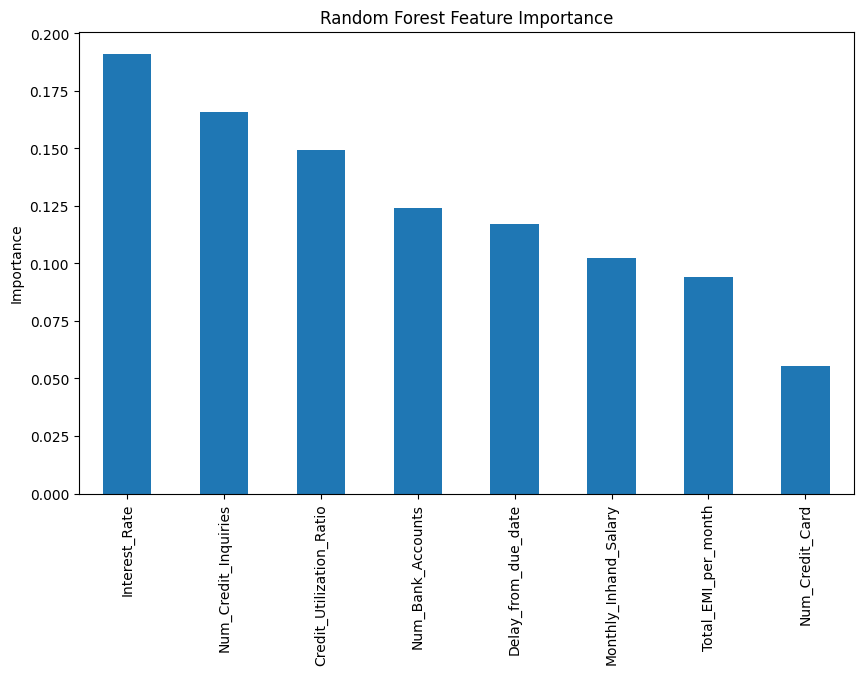

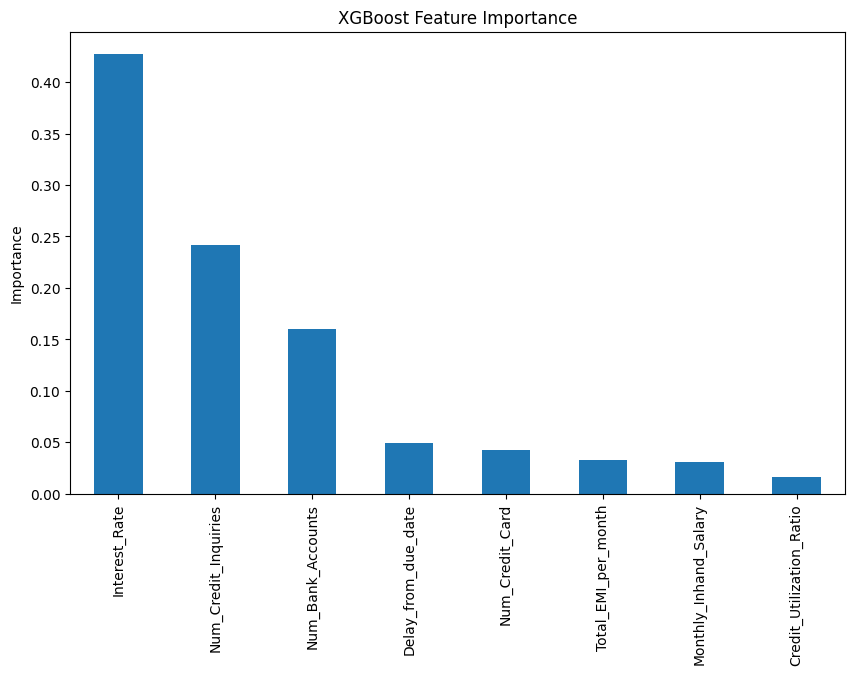

In [91]:
import matplotlib.pyplot as plt
import pandas as pd

# Feature importance for Random Forest
if 'rfc' in globals():
    rf_feature_importance = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    rf_feature_importance.plot(kind='bar')
    plt.title('Random Forest Feature Importance')
    plt.ylabel('Importance')
    plt.show()
else:
    print("Random Forest model not found. Please run the cell containing the Random Forest training code.")

# Feature importance for XGBoost
if 'xgb' in globals():
    xgb_feature_importance = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    xgb_feature_importance.plot(kind='bar')
    plt.title('XGBoost Feature Importance')
    plt.ylabel('Importance')
    plt.show()
else:
     print("XGBoost model not found. Please run the cell containing the XGBoost training code.")




Generating PDP for Random Forest...


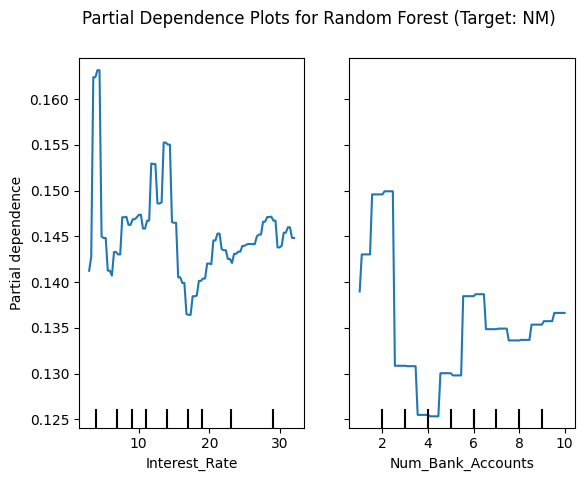

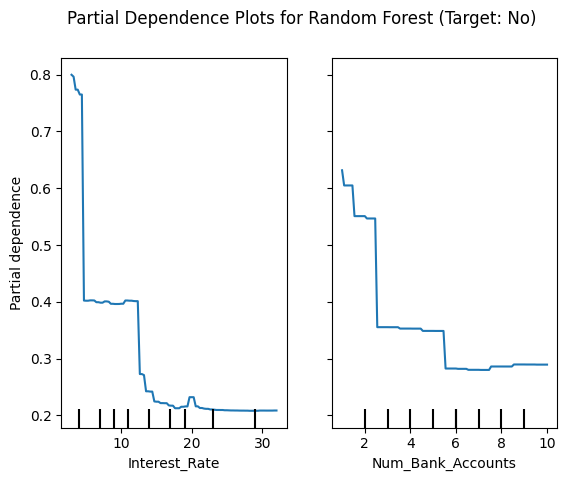

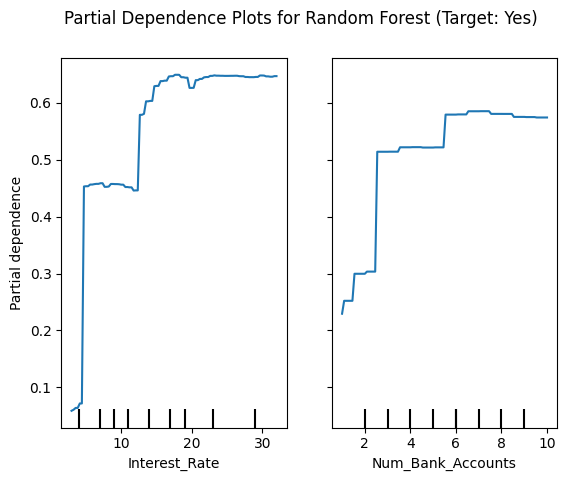

Generating PDP for XGBoost...


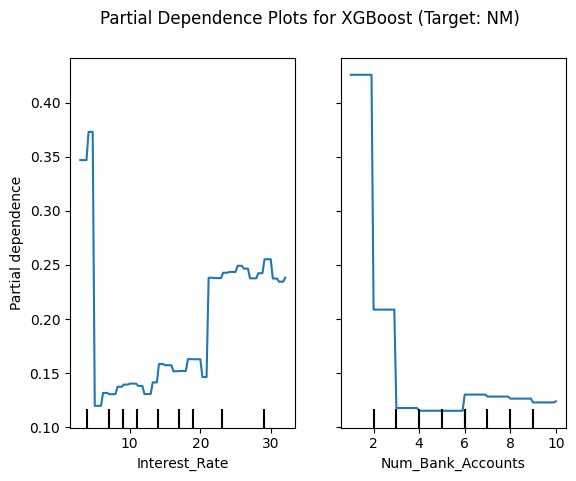

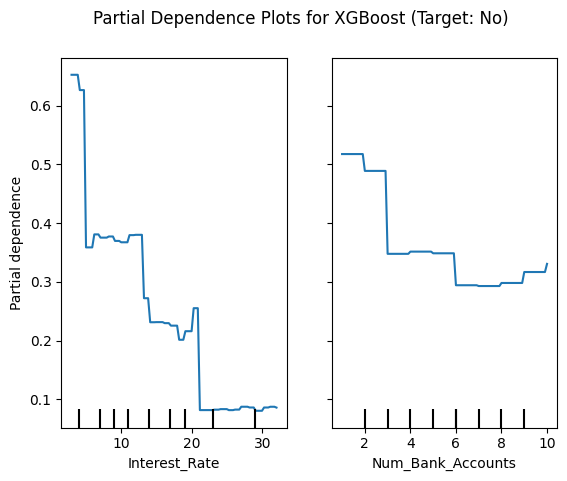

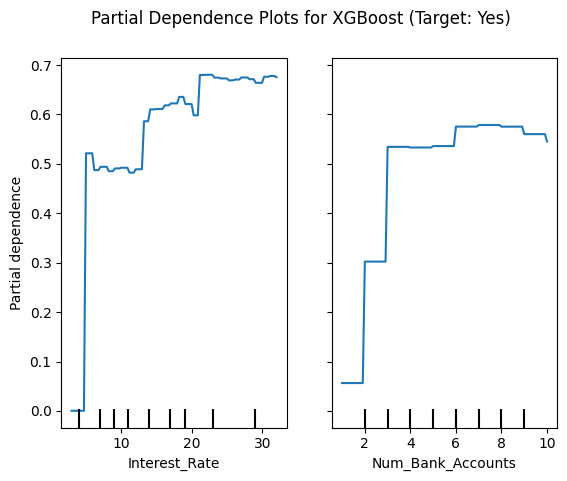

In [9]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

features_to_plot = ['Interest_Rate', 'Num_Bank_Accounts']

# Partial Dependence Plots for Random Forest
if 'rfc' in globals():
    print("Generating PDP for Random Forest...")
    for i, class_name in enumerate(le.classes_):
        PartialDependenceDisplay.from_estimator(rfc, X_test, features_to_plot, target=i)
        plt.suptitle(f"Partial Dependence Plots for Random Forest (Target: {class_name})")
        plt.show()
else:
    print("Random Forest model not found.")

# Partial Dependence Plots for XGBoost
if 'xgb' in globals():
    print("Generating PDP for XGBoost...")
    for i, class_name in enumerate(le.classes_):
        PartialDependenceDisplay.from_estimator(xgb, X_test, features_to_plot, target=i)
        plt.suptitle(f"Partial Dependence Plots for XGBoost (Target: {class_name})")
        plt.show()
else:
    print("XGBoost model not found.")

In [10]:
import shap
background = shap.sample(X_train, 100)

In [27]:
# Create an explainer for each model
rfc_explainer = shap.TreeExplainer(rfc, background)
xgb_explainer = shap.TreeExplainer(xgb, background)
print('Built the explainer')
# Calculate SHAP values for the test set
# The output is a shap.Explainer object containing the SHAP values
rfc_shap_values = rfc_explainer.shap_values(X_test[:60])
xgb_shap_values = xgb_explainer.shap_values(X_test[:60])
print('Calculated the shap values')

# Note: For classification, shap_values returns a list of arrays (one for each class).
# For binary classification, we usually inspect the SHAP values for the predicted class (index 1).
rfc_shap_values_class1 = rfc_shap_values[1]
xgb_shap_values_class1 = xgb_shap_values[1]
print('Calculated the shap values for class 1')

Built the explainer


 99%|===================| 178/180 [00:35<00:00]       

Calculated the shap values
Calculated the shap values for class 1


--- Random Forest Classifier Feature Importance ---


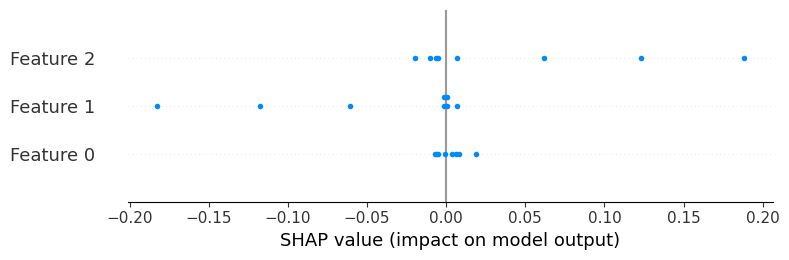


--- XGBoost Classifier Feature Importance ---


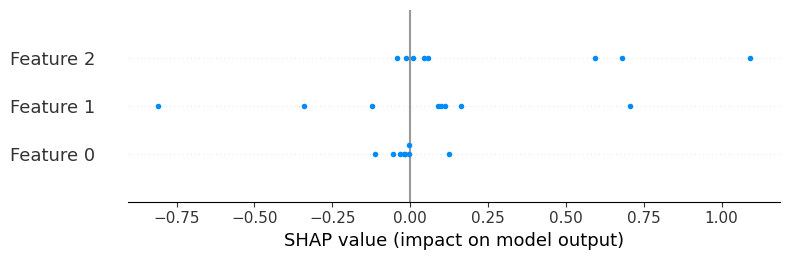

In [29]:
print("--- Random Forest Classifier Feature Importance ---")
shap.summary_plot(
    rfc_shap_values_class1
)

print("\n--- XGBoost Classifier Feature Importance ---")
shap.summary_plot(
    xgb_shap_values_class1)

In [33]:
!pip install  lime
from lime import lime_tabular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=47f569df060f61b1a901baa1770485aa1dadeb6410a54d08c017d1aa9da3d8b4
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime
